Promoting goods and services is crucial for businesses to attract new clients, hold onto current ones, and boost sales. In order to generate a temporary rise in demand, businesses frequently devise sales methods that align with their unique products and target market.

However, there are many types of customers, and each customer has a different income and a budget for spending on various items, which leads to the fact that the business can only use the exact sales/offers for some customers that visit the store.

Solutions: categorize the customers into specific groups based on the various categories. Based on the group of the business we can offer suitable products to not only make it intriguing to attract customers but also retain the old customers.

Goal: Gaining insight into customers' behaviors for offering suitable products.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings
warnings.filterwarnings('ignore')

# EXPLORATORY DATA ANALYSIS

## IMPORT THE DATA FROM GOOGLE DRIVE

In [3]:
DATA_PATH = "/content/drive/MyDrive/Data Analysis for High Dimensional Space/Data Analysis for High Dimensional Space.csv"

In [4]:
# Library for reading csv file and data summary
import pandas as pd

# Read the csv file
df = pd.read_csv(DATA_PATH)

# The data is stored as dataframe
# See the first 10 records of the dataframe
df.head(10)

,Total score,1. What is your age?,1. What is your age? [Score],1. What is your age? [Feedback],2. What is your gender?,2. What is your gender? [Score],2. What is your gender? [Feedback],3. What is your highest education?,3. What is your highest education? [Score],3. What is your highest education? [Feedback],4. What is your marital status?,4. What is your marital status? [Score],4. What is your marital status? [Feedback],5. What is your monthly income? (Monthly allowance if you are not working) (in million VND),5. What is your monthly income? (Monthly allowance if you are not working) (in million VND) [Score],5. What is your monthly income? (Monthly allowance if you are not working) (in million VND) [Feedback],6. What is the total monthly amount you spend? (in million VND),6. What is the total monthly amount you spend? (in million VND) [Score],6. What is the total monthly amount you spend? (in million VND) [Feedback]
0,0.00 / 0,16,-- / 0,NaN,Male,-- / 0,NaN,High school,-- / 0,NaN,Single,-- / 0,NaN,1.5,-- / 0,NaN,1.5,-- / 0,NaN
1,0.00 / 0,22,-- / 0,NaN,Male,-- / 0,NaN,Undergraduate,-- / 0,NaN,Single,-- / 0,NaN,10.0,-- / 0,NaN,7.4,-- / 0,NaN
2,0.00 / 0,30,-- / 0,NaN,Female,-- / 0,NaN,Master,-- / 0,NaN,Married,-- / 0,NaN,40.0,-- / 0,NaN,18.0,-- / 0,NaN
3,0.00 / 0,27,-- / 0,NaN,Female,-- / 0,NaN,Undergraduate,-- / 0,NaN,Single,-- / 0,NaN,18.0,-- / 0,NaN,12.0,-- / 0,NaN
4,0.00 / 0,18,-- / 0,NaN,Female,-- / 0,NaN,High school,-- / 0,NaN,Single,-- / 0,NaN,8.0,-- / 0,NaN,5.0,-- / 0,NaN
5,0.00 / 0,42,-- / 0,NaN,Male,-- / 0,NaN,Undergraduate,-- / 0,NaN,Married,-- / 0,NaN,40.0,-- / 0,NaN,28.0,-- / 0,NaN
6,0.00 / 0,27,-- / 0,NaN,Female,-- / 0,NaN,Master,-- / 0,NaN,Married,-- / 0,NaN,27.0,-- / 0,NaN,15.0,-- / 0,NaN
7,0.00 / 0,46,-- / 0,NaN,Female,-- / 0,NaN,Master,-- / 0,NaN,Married,-- / 0,NaN,80.0,-- / 0,NaN,35.0,-- / 0,NaN
8,0.00 / 0,28,-- / 0,NaN,Male,-- / 0,NaN,High school,-- / 0,NaN,Single,-- / 0,NaN,23.0,-- / 0,NaN,10.0,-- / 0,NaN
9,0.00 / 0,32,-- / 0,NaN,Male,-- / 0,NaN,Master,-- / 0,NaN,Divorced,-- / 0,NaN,43.0,-- / 0,NaN,30.0,-- / 0,NaN


## FILTERING OUT THE UNNECESSARY COLUMNS

After seeing the first 10 records from the `dataframe (df)`, there is only several columns that we want to keep, which are the columns that hold the meaningful data.

We will keep those columns while the rest will be deleted.

In [5]:
COLUMN_KEPT = ['1. What is your age?', '2. What is your gender?', '3. What is your highest education?',
                  '4. What is your marital status?', '5. What is your monthly income? (Monthly allowance if you are not working) (in million VND)',
                  '6. What is the total monthly amount you spend? (in million VND)']

df = df[COLUMN_KEPT]

Let's see the first 10 records of the `dataframe (df)` again.

In [6]:
df.head(10)

,1. What is your age?,2. What is your gender?,3. What is your highest education?,4. What is your marital status?,5. What is your monthly income? (Monthly allowance if you are not working) (in million VND),6. What is the total monthly amount you spend? (in million VND)
0,16,Male,High school,Single,1.5,1.5
1,22,Male,Undergraduate,Single,10.0,7.4
2,30,Female,Master,Married,40.0,18.0
3,27,Female,Undergraduate,Single,18.0,12.0
4,18,Female,High school,Single,8.0,5.0
5,42,Male,Undergraduate,Married,40.0,28.0
6,27,Female,Master,Married,27.0,15.0
7,46,Female,Master,Married,80.0,35.0
8,28,Male,High school,Single,23.0,10.0
9,32,Male,Master,Divorced,43.0,30.0


In [7]:
COLUMN_NEW_NAME = {'1. What is your age?' : 'age', 
                   '2. What is your gender?' : 'gender', 
                   '3. What is your highest education?' : 'education',
                   '4. What is your marital status?' : 'marital_status', 
                   '5. What is your monthly income? (Monthly allowance if you are not working) (in million VND)' : 'income',
                   '6. What is the total monthly amount you spend? (in million VND)' : 'spending'}

df = df.rename(columns=COLUMN_NEW_NAME)

Our primary interest is researching how customers spend their money, so:

 1.   If a wealthy buyer is willing to make a large purchase, we can group them and suggest some pricey things.
 2.   If consumer segments (such as students) are not wealthy monetarily, we can suggest inexpensive things or combos that are appropriate for them.

To do so, we need to know how much their monthly salary they spend. We already had `spending` and `income` data, so all we need to do is to calculate the `spending as a percentage of income` and use them as a feature for our research.

In [8]:
df['spending as a percentage of income'] = df['spending'] / df['income']

In [9]:
df.head(10)

,age,gender,education,marital_status,income,spending,spending as a percentage of income
0,16,Male,High school,Single,1.5,1.5,1.000000
1,22,Male,Undergraduate,Single,10.0,7.4,0.740000
2,30,Female,Master,Married,40.0,18.0,0.450000
3,27,Female,Undergraduate,Single,18.0,12.0,0.666667
4,18,Female,High school,Single,8.0,5.0,0.625000
5,42,Male,Undergraduate,Married,40.0,28.0,0.700000
6,27,Female,Master,Married,27.0,15.0,0.555556
7,46,Female,Master,Married,80.0,35.0,0.437500
8,28,Male,High school,Single,23.0,10.0,0.434783
9,32,Male,Master,Divorced,43.0,30.0,0.697674


## DATA CLEANING

Before diving into data visualization, we want to have:

*   Null values check
*   Numerical values check
*   Outliers check
*   Categorical values check





### Data imputation

In [10]:
df.dtypes

age                                     int64
gender                                 object
education                              object
marital_status                         object
income                                float64
spending                              float64
spending as a percentage of income    float64
dtype: object

In [11]:
df['spending as a percentage of income'].describe()

count    106.000000
mean            inf
std             NaN
min        0.333333
25%        0.600000
50%        0.714286
75%        0.815559
max             inf
Name: spending as a percentage of income, dtype: float64

So there is a problem with our new column `spending as a percentage of income`.

Since `spending as a percentage of income` = `spending` / `income`, if at some of our records the `income = 0`, we cannot calculate `spending as a percentage of income`. As a result, the value will be `inf`. To compensate with this, we have to impute the `inf` value. In this situation, we will replace them with `1.0`.

In [12]:
df[df['spending as a percentage of income'] == float('inf')]

,age,gender,education,marital_status,income,spending,spending as a percentage of income
15,24,Female,Master,Single,0.0,5.0,inf
64,22,Male,Undergraduate,Together,0.0,3.5,inf
66,22,Female,Master,Together,0.0,4.5,inf
71,20,Female,High school,Single,0.0,3.0,inf


Replace `float('inf')` with `float(1.0)`.

In [13]:
df['spending as a percentage of income'] = df['spending as a percentage of income'].replace([float('inf')], float(1.0))

Take a look at our `spending as a percentage of income` again.

In [14]:
df['spending as a percentage of income'].describe()

count    106.000000
mean       0.720331
std        0.167376
min        0.333333
25%        0.600000
50%        0.714286
75%        0.815559
max        1.250000
Name: spending as a percentage of income, dtype: float64

We will now recheck if there is any `inf` value left in the column `spending as a percentage of income`.

In [15]:
df[df['spending as a percentage of income'] == float('inf')]

,age,gender,education,marital_status,income,spending,spending as a percentage of income


Since 

### Null values check

In [16]:
#isnull: check if it is null
df.isnull().sum()

age                                   0
gender                                0
education                             0
marital_status                        0
income                                0
spending                              0
spending as a percentage of income    0
dtype: int64

In [17]:
#isna: check if it is not a number
df.isna().sum()

age                                   0
gender                                0
education                             0
marital_status                        0
income                                0
spending                              0
spending as a percentage of income    0
dtype: int64

We can clearly see that there are no missing values in our data, which is good!

### Numerical values check

In [18]:
df.dtypes

age                                     int64
gender                                 object
education                              object
marital_status                         object
income                                float64
spending                              float64
spending as a percentage of income    float64
dtype: object

There are 4 categories that are numerical: `age`, `income`, `spending` and `spending as a percentage of income`

In [19]:
df[['age', 'income', 'spending', 'spending as a percentage of income']].describe()

,age,income,spending,spending as a percentage of income
count,106.00000,106.000000,106.000000,106.000000
mean,25.45283,19.438679,13.081132,0.720331
std,5.09366,17.117201,10.153462,0.167376
min,16.00000,0.000000,1.500000,0.333333
25%,22.00000,7.000000,5.000000,0.600000
50%,25.00000,15.000000,10.000000,0.714286
75%,28.00000,26.750000,18.750000,0.815559
max,46.00000,100.000000,50.000000,1.250000


At first glance, nothing appears to be abnormal:


*   Nothing unusual about `age` (the minimum is 16 and the maximum is 46).
*   So does `income`, `spending` and `spending as a percentage of income`.

Therefore, based on these statistical data, we are unable to identify any outliers in the numerical data.



### Outliers check

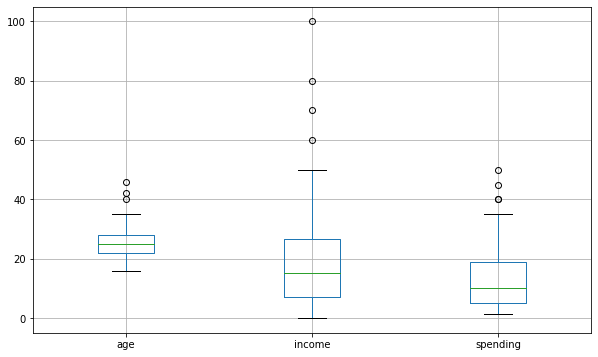

In [20]:
df[['age', 'income', 'spending']].boxplot(figsize=[10, 6]);

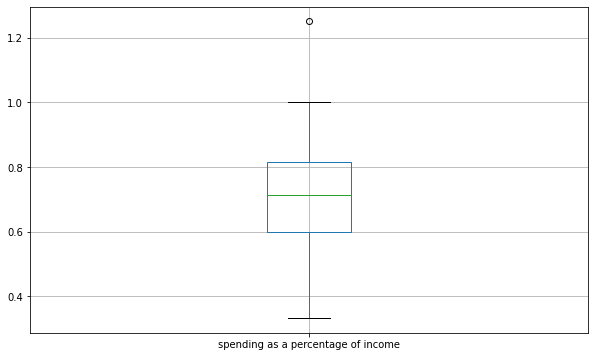

In [21]:
df[['spending as a percentage of income']].boxplot(figsize=[10, 6]);

In [22]:
# Import seaborn to overlay a line over the dataframe
import seaborn as sns
import matplotlib.pyplot as plt

def draw_lr_line(df: pd.DataFrame):
  graph = 0
  for row in ['age', 'income', 'spending', 'spending as a percentage of income']:
    for col in ['age', 'income', 'spending', 'spending as a percentage of income']:
      plt.figure(1 , figsize = (20 , 20))
      graph += 1
      plt.subplot(4, 4, graph)
      sns.regplot(data=df, x=row, y=col)

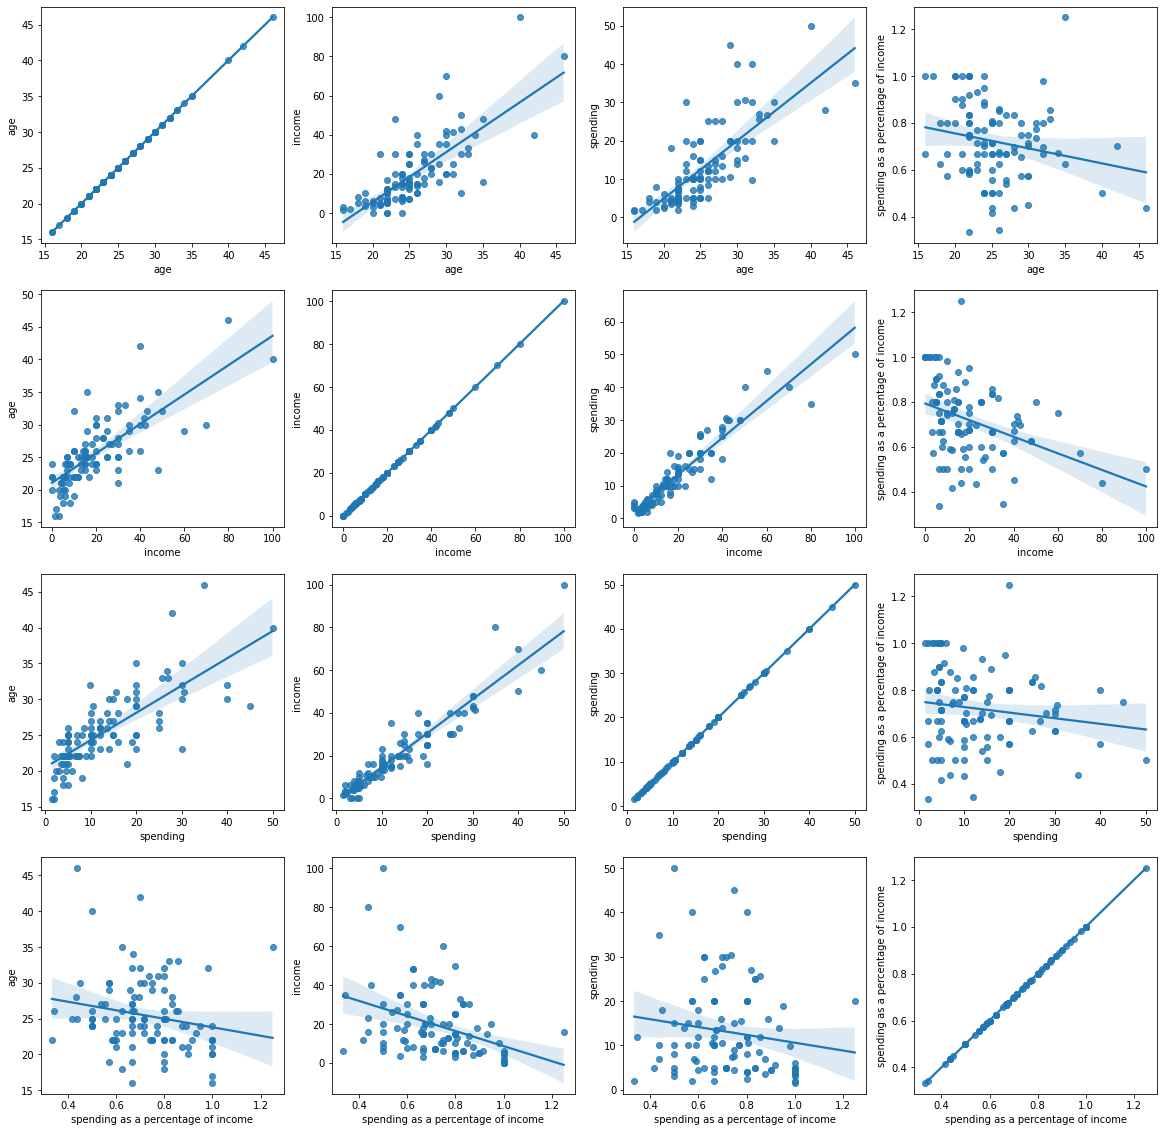

In [23]:
draw_lr_line(df=df)

From the above scatterplot along with the regression line, we can see that the outlier appears in one record, which is the record that has `spending as a percentage of income` > `1.0` ⟶ We need to delete the outlier. 

In [24]:
df.drop(df[df['spending as a percentage of income'] > 1.0].index, inplace=True)

Plot again to check

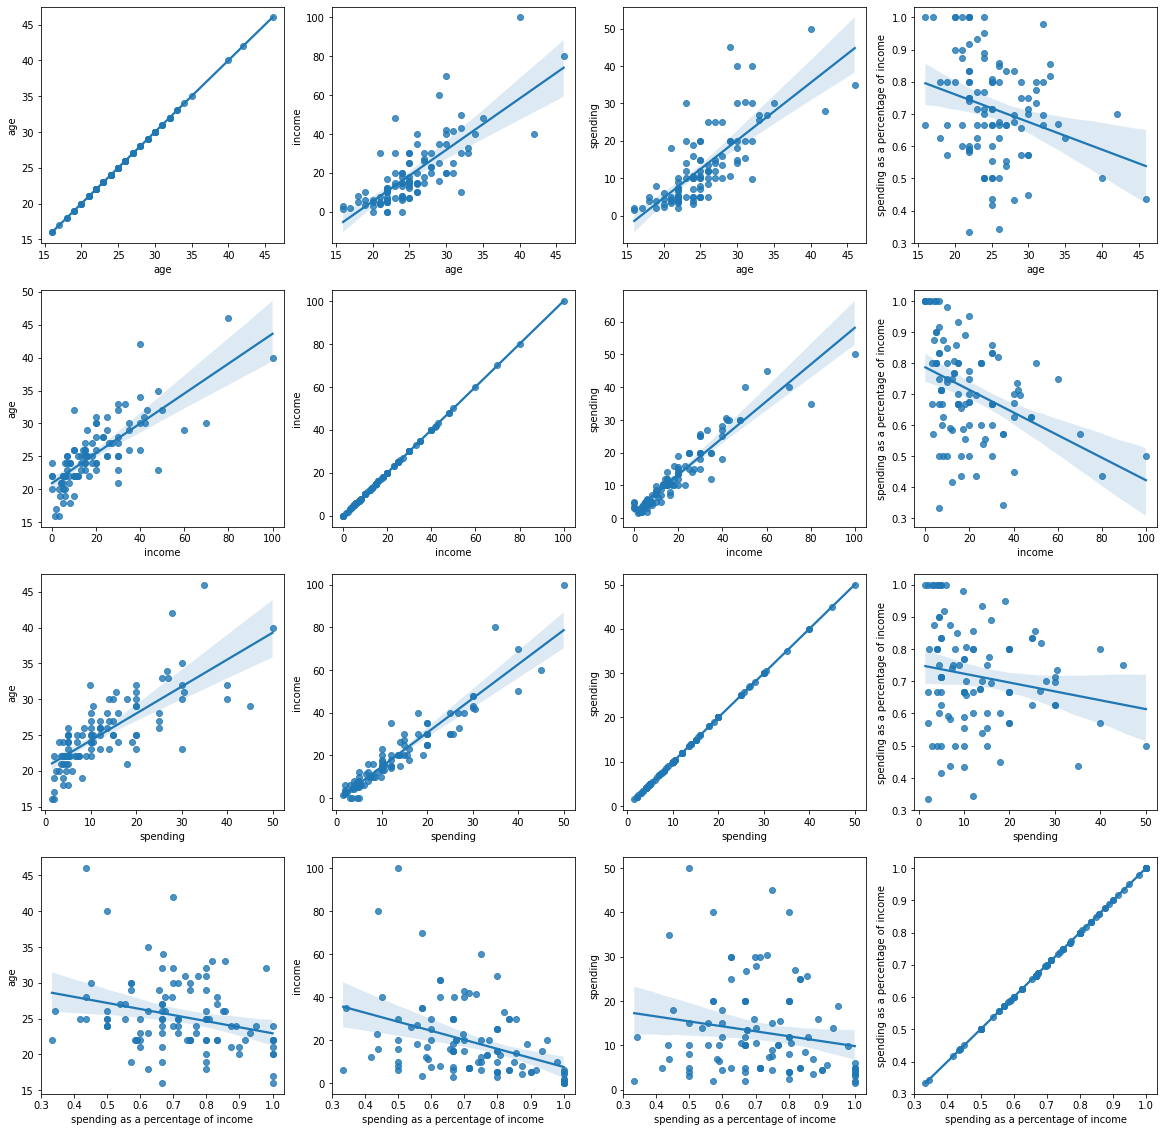

In [25]:
draw_lr_line(df=df)

### Categorical values check

In [26]:
df.dtypes

age                                     int64
gender                                 object
education                              object
marital_status                         object
income                                float64
spending                              float64
spending as a percentage of income    float64
dtype: object

In [27]:
for column in df.columns:
  if column not in ['age', 'income', 'spending', 'spending as a percentage of income']:
    print(f"{df[column].value_counts()}\n")

Male      57
Female    48
Name: gender, dtype: int64

Undergraduate    49
Master           32
High school      22
PhD or higher     2
Name: education, dtype: int64

Together    36
Married     34
Single      31
Divorced     4
Name: marital_status, dtype: int64



## DATA VISUALIZATION

Let's have some visualization of the distribution of the numerical features

In [28]:
import matplotlib.pyplot as plt

def plot_distribution(df: pd.DataFrame):
  graph = 0
  for col in df.columns:
    plt.figure(1 , figsize = (20 , 8))
    graph += 1
    plt.subplot(4, 3, graph)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    if (str(df[col].dtypes) == 'object'):
      df[col].value_counts().plot(kind='barh', title=col)
    else:
      df[col].plot.hist(bins=30, title=col)

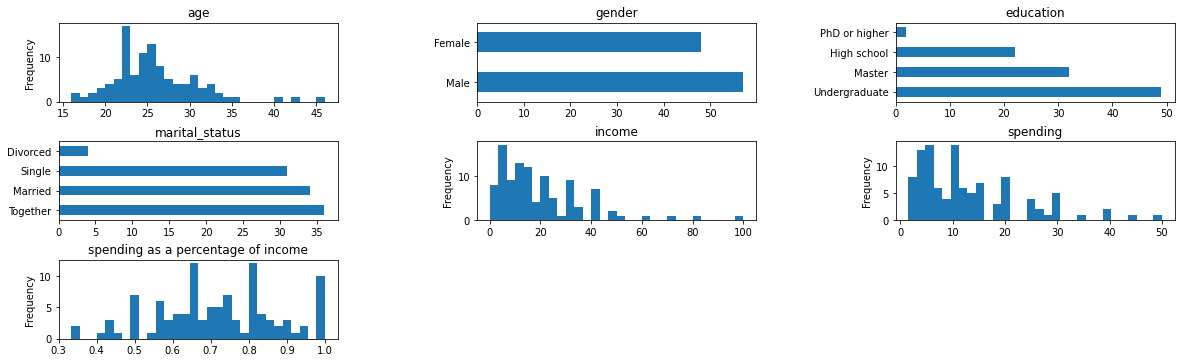

In [29]:
plot_distribution(df)

Overall, although the dataset is small, we can still see the distribution of data is quiet normal.

*   For age, the majority of the participants are young people from 21 to 30 years old.
*   For the income, since most of the participants are the youth, the data implies that their income will mostly center around 0 to roughly 20 million VND, and thus the data will be right-skewed.
*   Since the spending is strongly influenced by the monthly income, we can see that the spending will also be right-skewed.



Let's save our clean data into Google Drive

In [30]:
CLEAN_DATA_PATH = '/content/drive/MyDrive/Data Analysis for High Dimensional Space/cleaned _ Data Analysis for High Dimensional Space.csv'

df.to_csv(CLEAN_DATA_PATH, index=False, header=True)

# HIERARCHICAL CLUSTERING (AGGLOMERATIVE METHOD)

## IMPORT THE CLEANED DATA

In [31]:
# Import the clean data
cleaned_df = pd.read_csv(CLEAN_DATA_PATH)
cleaned_df.head(10)

,age,gender,education,marital_status,income,spending,spending as a percentage of income
0,16,Male,High school,Single,1.5,1.5,1.000000
1,22,Male,Undergraduate,Single,10.0,7.4,0.740000
2,30,Female,Master,Married,40.0,18.0,0.450000
3,27,Female,Undergraduate,Single,18.0,12.0,0.666667
4,18,Female,High school,Single,8.0,5.0,0.625000
5,42,Male,Undergraduate,Married,40.0,28.0,0.700000
6,27,Female,Master,Married,27.0,15.0,0.555556
7,46,Female,Master,Married,80.0,35.0,0.437500
8,28,Male,High school,Single,23.0,10.0,0.434783
9,32,Male,Master,Divorced,43.0,30.0,0.697674


## ONE-HOT ENCODING

The text cannot be used to put into the model. One approach to the issue is to one-hot encode the data into a numeric datatype that is model-readable.
By default, we want to encode `Male` to be 1 and `Female` to be 0, so we'll rename `gender_Male` to `gender`

In [32]:
# Convert raw dataframe into one-hot encoded dataframe
onehot_df = pd.get_dummies(cleaned_df, drop_first=True)

# Rename gender_Male to gender
onehot_df = onehot_df.rename(columns={"gender_Male" : "gender"})

# Double-check by visualization
onehot_df.head()

,age,income,spending,spending as a percentage of income,gender,education_Master,education_PhD or higher,education_Undergraduate,marital_status_Married,marital_status_Single,marital_status_Together
0,16,1.5,1.5,1.000000,1,0,0,0,0,1,0
1,22,10.0,7.4,0.740000,1,0,0,1,0,1,0
2,30,40.0,18.0,0.450000,0,1,0,0,1,0,0
3,27,18.0,12.0,0.666667,0,0,0,1,0,1,0
4,18,8.0,5.0,0.625000,0,0,0,0,0,1,0


## DENDROGRAM

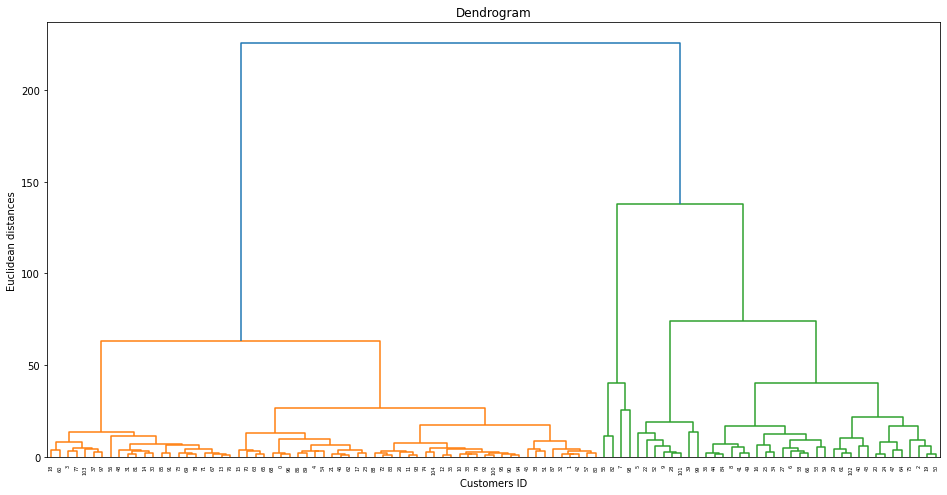

In [33]:
# Importing the required module
import scipy

# Graph size
plt.figure(1, figsize = (16, 8))

# Choose centroid as linkage
linkage = scipy.cluster.hierarchy.linkage(y=onehot_df, method="ward", metric='euclidean')
# Creating the dendrogram
dendrogram = scipy.cluster.hierarchy.dendrogram(Z=linkage)

# Ploting the graph
plt.title('Dendrogram')
plt.xlabel('Customers ID')
plt.ylabel('Euclidean distances')
plt.show()

## AGGLOMERATIVE CLUSTERING

First we want to find number of clusters we should choose to segment our data using `Sillhouette Score`

In [34]:
# Import required libraries
import sklearn
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

K = 30
ks = []
silhouette_avgs = []
for k in range(2, K):
  # Initialize the model with k clusters
  model = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
  cluster_labels = model.fit_predict(onehot_df)
  # Calculate sillhouette score
  silhouette_avg = sklearn.metrics.silhouette_score(onehot_df, cluster_labels)
  ks.append(k)
  silhouette_avgs.append(silhouette_avg)

Let's plot our `Sillhouette Score` so that we can make decision about the `k`:

Highest Silhouette Score at k = 3


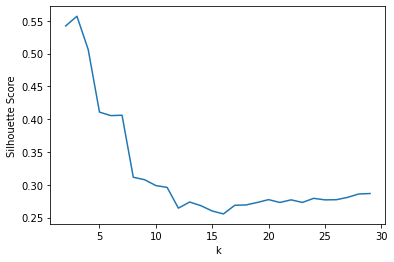

In [35]:
plt.plot(ks, silhouette_avgs);
plt.xlabel("k")
plt.ylabel("Silhouette Score")
print(f"Highest Silhouette Score at k = {ks[np.argmax(silhouette_avgs)]}")

The output plot shows that the best number of clusters we can get out of our dataset can be 2 to 5.

Let's visualize our sillhouette score on individual features

In [36]:
# Import required libraries
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

def SilhouetteVisualizer_AgglomerativeClustering(max_k: int, min_k: int=2, df: pd.DataFrame=onehot_df):
  for k in range(min_k, max_k + 1):
    # Create a subplot with 1 row and 2 columns
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(15, 7)

    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax.set_xlim([-0.1, 1])

    # The (n_clusters + 1) * 10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax.set_ylim([0, len(df) + (k + 1) * 10])

    # Initialize the model with k clusters
    model = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    cluster_labels = model.fit_predict(df)

    # Calculate sillhouette score
    silhouette_avg = sklearn.metrics.silhouette_score(df, cluster_labels)
    print(f"For k = {k}, the average silhouette_score is: {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df, cluster_labels)

    y_lower = 10
    for i in range(k):
      # Aggregate the silhouette scores for samples belonging to
      # cluster i, and sort them
      ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
      # Sort them for better visualization
      ith_cluster_silhouette_values.sort()
      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i
      color = cm.nipy_spectral(float(i) / k)
      ax.fill_betweenx(
          np.arange(y_lower, y_upper),
          0,
          ith_cluster_silhouette_values,
          facecolor=color,
          edgecolor=color,
          alpha=0.7,
      )
      # Label the silhouette plots with their cluster numbers at the middle
      ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
      # Compute the new y_lower for next plot
      y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title(f"k = {k}")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
  plt.show();

For k = 2, the average silhouette_score is: 0.5420435455508221
For k = 3, the average silhouette_score is: 0.5568089303249595
For k = 4, the average silhouette_score is: 0.5060276205134095
For k = 5, the average silhouette_score is: 0.4107190913313853
For k = 6, the average silhouette_score is: 0.40537630632959415


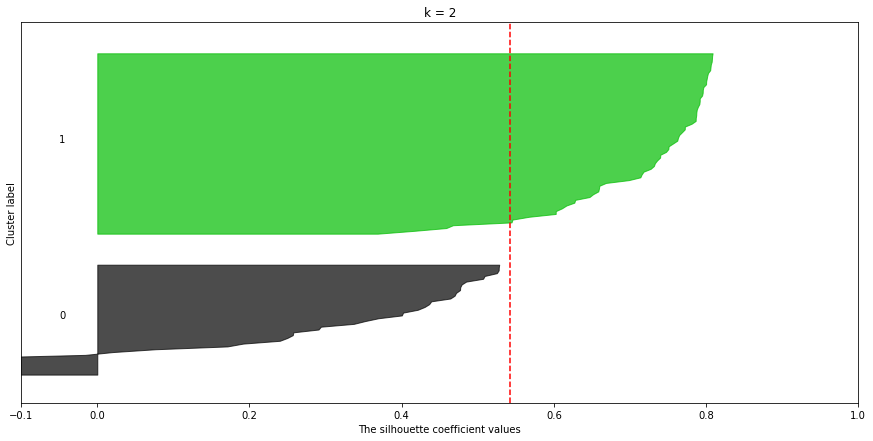

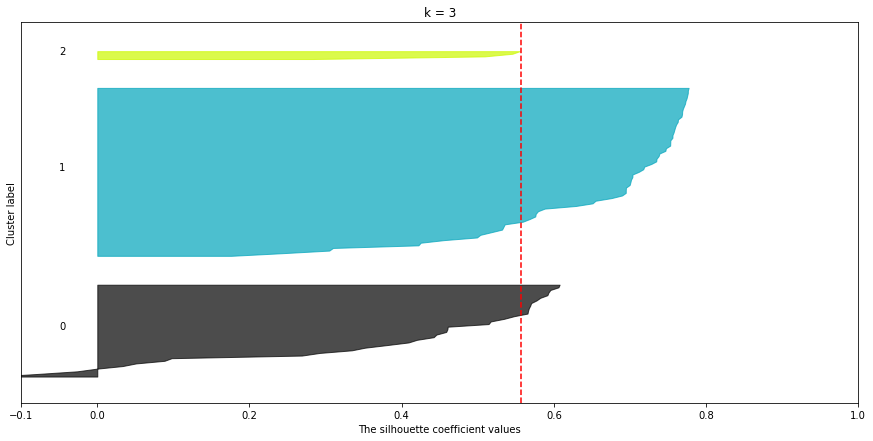

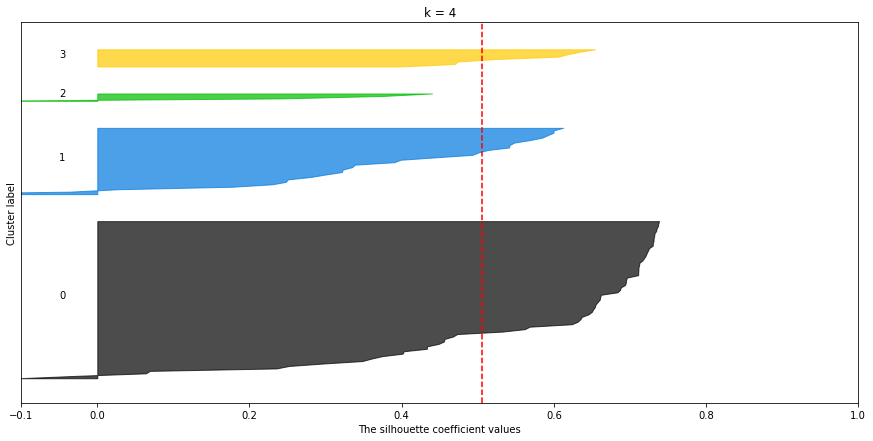

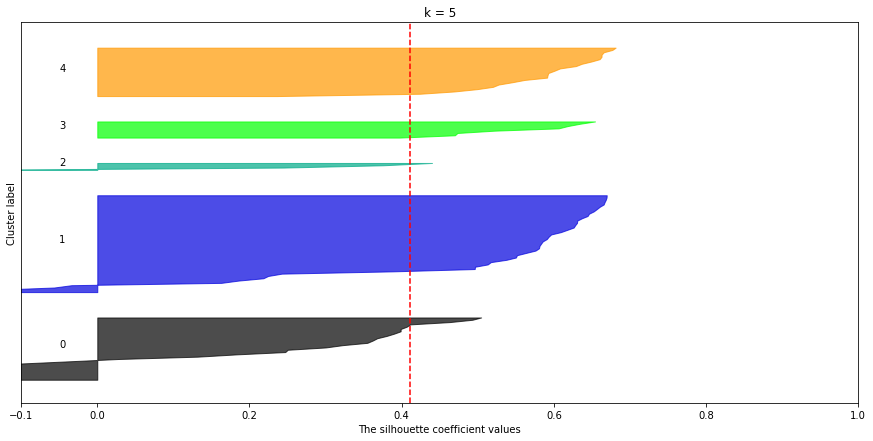

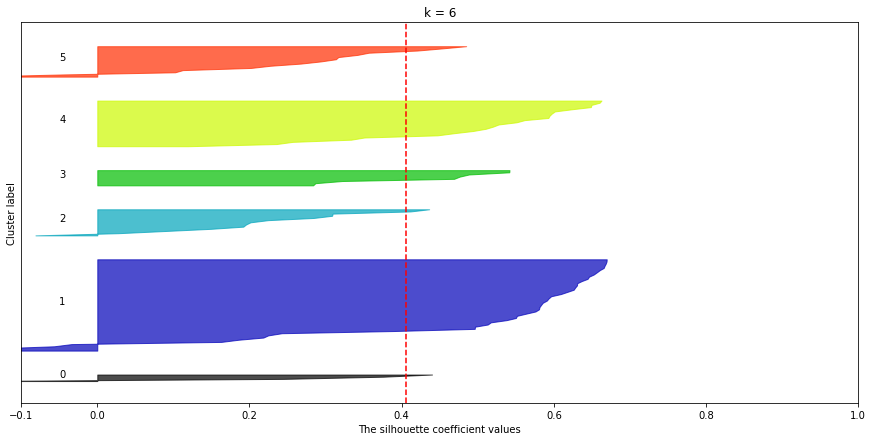

In [37]:
SilhouetteVisualizer_AgglomerativeClustering(min_k=2, max_k=6)

From the plot above, we'll choose `k = 5` ⟶ `Euclidean distance ≈ 50` 

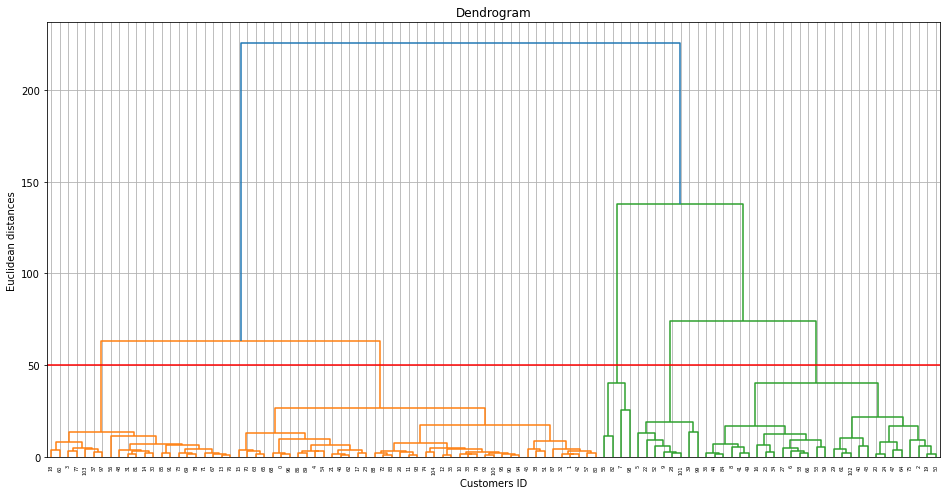

In [38]:
# size of image
plt.figure(1, figsize = (16, 8))  
plt.grid(b=None)

# Choose centroid as linkage
linkage = scipy.cluster.hierarchy.linkage(y=onehot_df, method="ward", metric='euclidean')

# Creating the dendrogram
dendrogram = scipy.cluster.hierarchy.dendrogram(Z=linkage)

# theroshold
plt.axhline(y=50, color='red')

# ploting graphabs
plt.title('Dendrogram')
plt.xlabel('Customers ID')
plt.ylabel('Euclidean distances')
plt.show();

We'll insert the `Cluster` column into our `cleaned_df`

In [39]:
# Init the final model
final_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

# Predict the cluster on onehot_df
cluster_labels = final_model.fit_predict(onehot_df)

# Insert the cluster label into the cleaned_df
cleaned_df["Cluster"] = cluster_labels

In [40]:
cleaned_df

,age,gender,education,marital_status,income,spending,spending as a percentage of income,Cluster
0,16,Male,High school,Single,1.5,1.5,1.000000,1
1,22,Male,Undergraduate,Single,10.0,7.4,0.740000,1
2,30,Female,Master,Married,40.0,18.0,0.450000,0
3,27,Female,Undergraduate,Single,18.0,12.0,0.666667,4
4,18,Female,High school,Single,8.0,5.0,0.625000,1
...,...,...,...,...,...,...,...,...
100,22,Female,High school,Single,5.0,5.0,1.000000,1
101,30,Male,Undergraduate,Married,42.0,30.0,0.714286,3
102,25,Male,Master,Together,30.0,20.0,0.666667,0
103,22,Female,Undergraduate,Single,17.0,10.0,0.588235,4


In [41]:
def describe_feature(feature: str, df: pd.DataFrame=cleaned_df):
  if df[feature].dtypes == 'object':
    print(f"{feature}:\n{df.groupby(['Cluster', feature])[feature].count()}\n")
  else:
    print(f"{feature}:\n{df.groupby(['Cluster'])[feature].describe()}\n")

In [42]:
for col in cleaned_df.columns:
  if str(col) is not 'Cluster':
    describe_feature(feature=col)

age:
         count       mean       std   min    25%   50%    75%   max
Cluster                                                            
0         28.0  27.750000  2.989178  21.0  25.75  28.0  30.00  33.0
1         43.0  21.581395  2.432249  16.0  20.00  22.0  22.50  26.0
2          4.0  36.250000  8.180261  29.0  29.75  35.0  41.50  46.0
3          8.0  32.375000  5.316752  23.0  30.75  32.0  34.25  42.0
4         22.0  25.181818  2.196022  22.0  24.00  25.0  26.00  32.0

gender:
Cluster  gender
0        Female    14
         Male      14
1        Female    22
         Male      21
2        Female     1
         Male       3
3        Female     2
         Male       6
4        Female     9
         Male      13
Name: gender, dtype: int64

education:
Cluster  education    
0        High school       1
         Master           15
         PhD or higher     2
         Undergraduate    10
1        High school      19
         Master            4
         Undergraduate    20
2        

In [43]:
def plot_by_cluster(col_name: str, df: pd.DataFrame=cleaned_df):
  fig, ax = plt.subplots(figsize=(12, 8))
  for cluster in range(5): 
    sns.distplot(cleaned_df[cleaned_df.Cluster == cluster][col_name], ax = ax, label = 'Cluster ' + str(cluster))    
  plt.title(f"{col_name} by cluster")  
  plt.legend(); 
  plt.show();

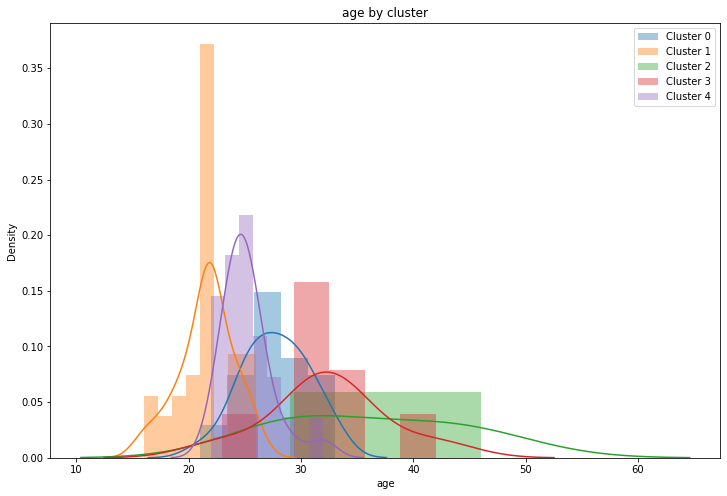

In [44]:
plot_by_cluster(col_name='age')

From the graph, we can see that cluster `0` and cluster `4` have similar in `age`, which is from teenagers (about `15` to `20` years old) to young adults (under `25` years old). The clusters `3`, `2`, and `1` spread evenly, especially in cluster `2`, the range of age extends from the beginning of `30` to the middle of `40` years old.

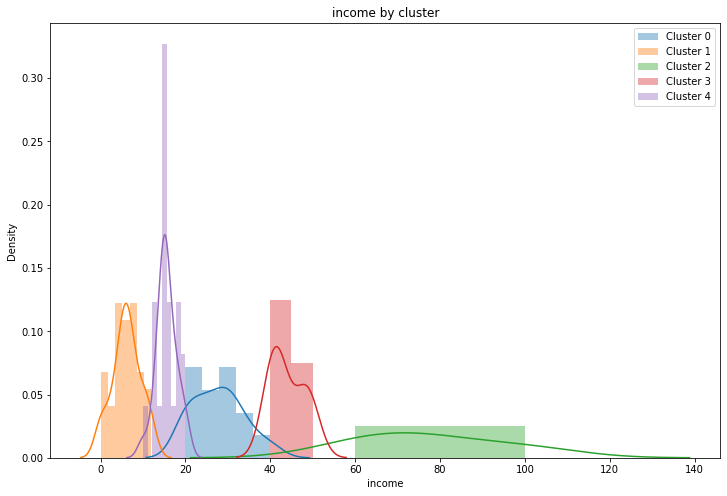

In [45]:
plot_by_cluster(col_name='income')

As mentioned earlier, clusters `0` and `4` have a similar age range. However, the `income` of the respective cluster differs despite the similar distribution. The mean income of cluster `4` is `15.545455`, and cluster `0` is `27.75` (from the statistic above). 

(Chỗ này viết lại, bị sai rồi, 0 vs 4 chứ không phải 1 và 4, 0 với 4 mới gần tuổi nhau)

In cluster `4`, the `income` is drastically higher compared to cluster `1` because this is the age when people have graduated and started working.

Even though the pattern in clusters `0`and `3` are similar regarding the age range (the adults), the mean `income` is entirely different: `27.75` compared to `44.0625` respectively (from the statistic above). This can be understandable because it implies that about 5 years of difference can make a vast `income` gap (meanwhile, the `education` and `marital_status` of both clusters are pretty similar (based on the statistic).

Cluster `2` makes a vast `income` gap compared to the other clusters. We can conclude that this is the group of wealthy people or people with much work experience and stable `income`. Additionally, this cluster's age range can be considered middle `age`, when people usually settle down in family and finance. 

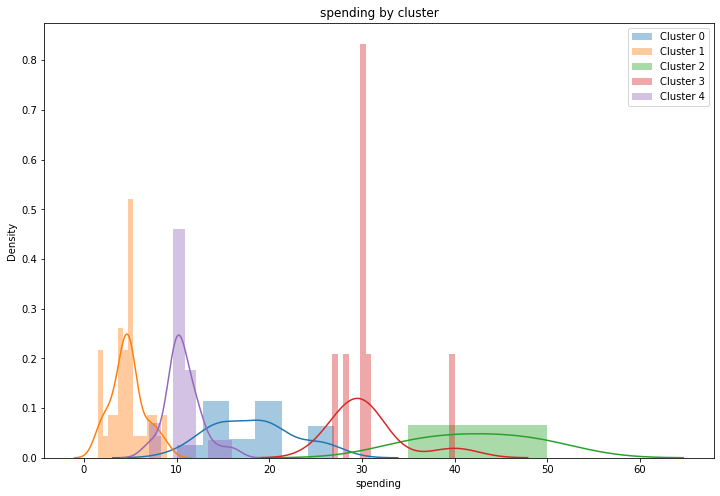

In [46]:
plot_by_cluster(col_name='spending')

From the demonstrated graph above, we can conclude that `spending` is proportional to `income`, which means that the more people earn, the more they spend.

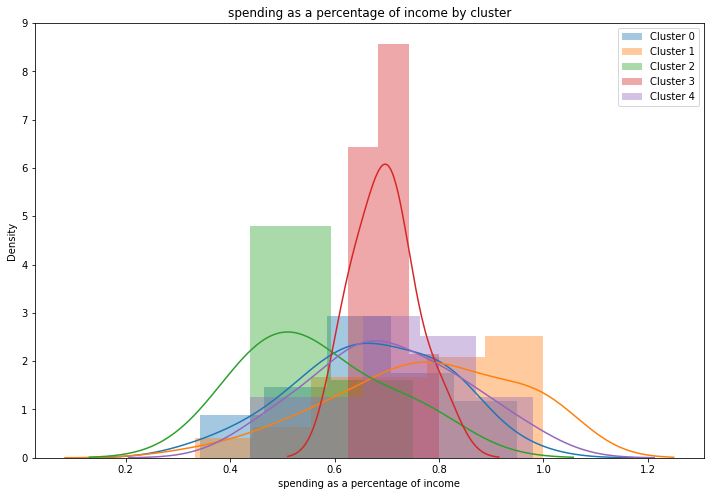

In [47]:
plot_by_cluster(col_name='spending as a percentage of income')

This graph shows that the means concerning `spending as a percentage of income` of the clusters are similar, except for cluster `2`. We can see that the mean percentage of `spending` in this cluster is around `50%`, which is 15% different from other clusters (around `70%`). However, this is the range of age that gained the most `income` (based on the statistic). Hence, the more people gain, the better they know how to control spending.

In [48]:
def plot_cluster(cluster: int, df: pd.DataFrame=cleaned_df):
  graph = 0
  for col_name in ['age', 'income', 'spending', 'spending as a percentage of income', 'gender', 'education', 'marital_status']:
    plt.figure(1, figsize = (12, 8))
    graph += 1
    plt.subplot(3, 3, graph)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    if (str(df[col_name].dtypes) == 'object'):
      df[df.Cluster == cluster][col_name].value_counts().plot(kind='barh', title=col_name)
    else:
      df[df.Cluster == cluster][col_name].plot.hist(bins=20, title=col_name)

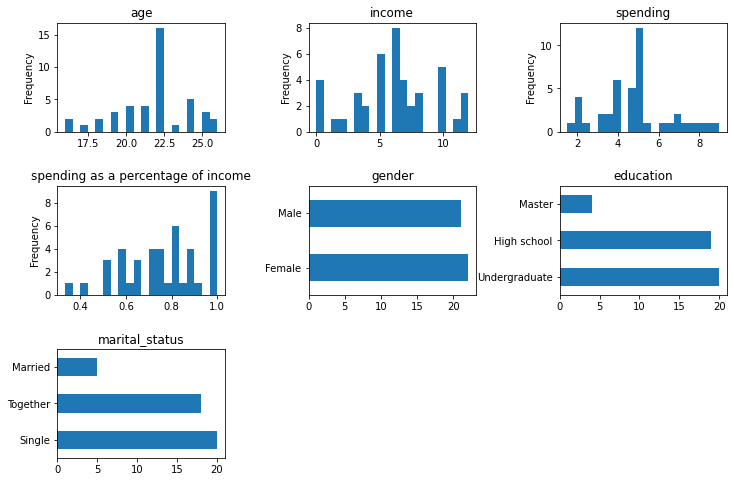

In [49]:
#Orange
plot_cluster(cluster=1)

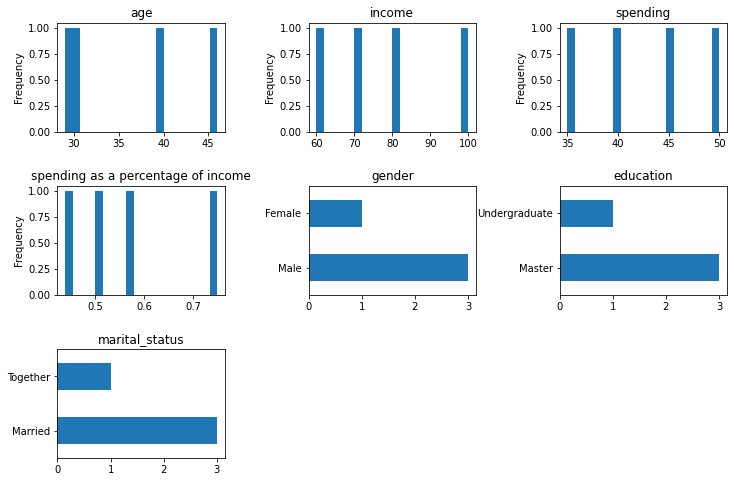

In [50]:
#Green
plot_cluster(cluster=2)

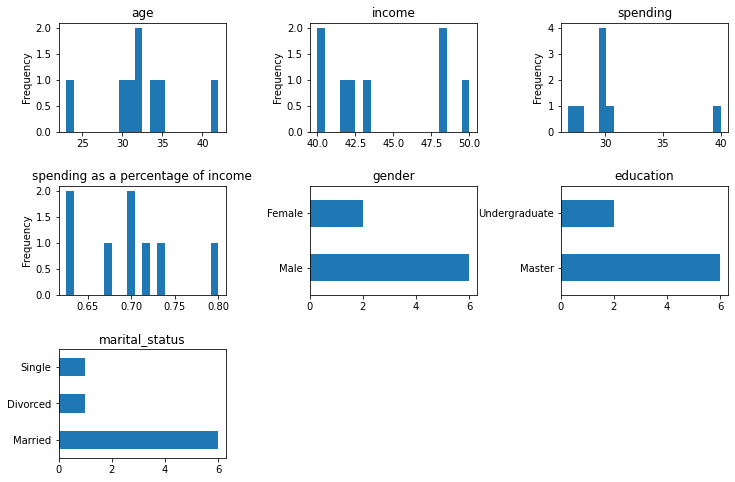

In [51]:
#Red
plot_cluster(cluster=3)

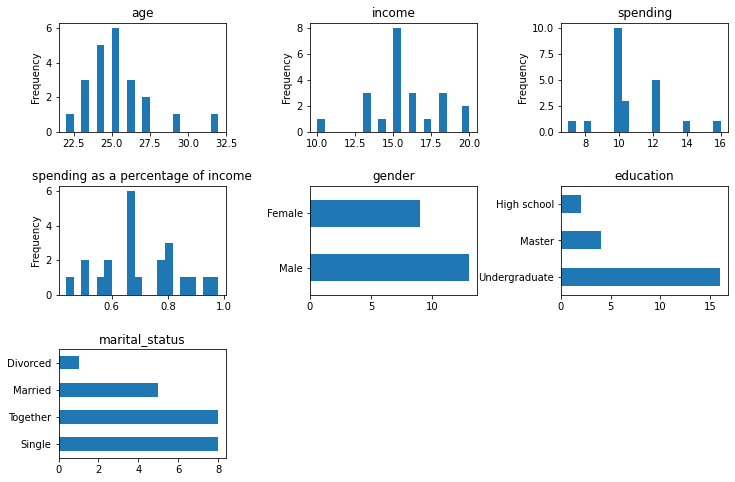

In [52]:
#Purple
plot_cluster(cluster=4)

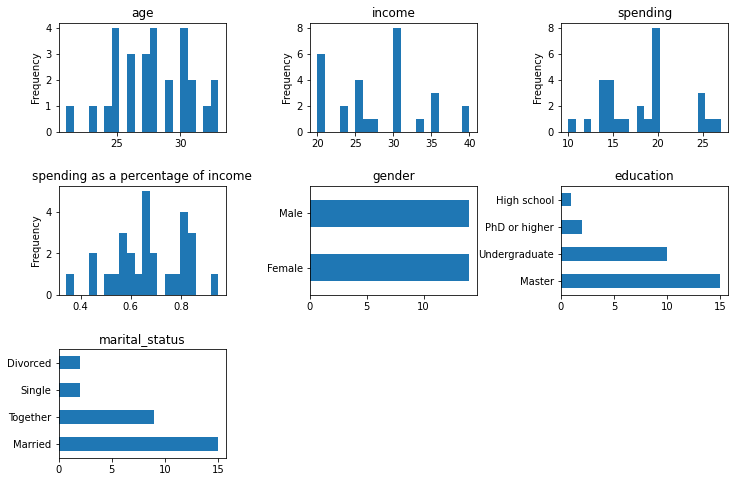

In [53]:
#Blue
plot_cluster(cluster=0)